In [63]:
import sklearn as sk
import numpy as np
import pandas as pd
import time
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from scipy import misc
from copy import deepcopy
from numpy.random import uniform
from numpy.random import normal
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
%matplotlib inline

# RBM implemention

In [66]:
class rbm:
    def __init__(self, learning_rate, mu_moment, batch_size, num_epochs, hidden_count):
        self.learning_rate = learning_rate
        self.mu_moment = mu_moment
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.hidden_count = hidden_count
        
    def sigmoid(self, matrix):
        return 1. / (1. + np.exp(-matrix))
    
    def init_weights(self, vis_count):
        self.w_vh = np.random.normal(0, 0.1, (vis_count, self.hidden_count))
        self.w_v = np.zeros(vis_count)
        self.w_h = np.zeros(self.hidden_count)
        
        self.wu_vh = np.zeros((vis_count, self.hidden_count))
        self.wu_v = np.zeros(vis_count)
        self.wu_h = np.zeros(self.hidden_count)
    
    def fit(self, x):
        self.init_weights(x.shape[1])
        batch_count = (x.shape[0]) // self.batch_size
        start_time = time.time()
        for epoch in range(self.num_epochs):
            print "Epoch num:", epoch+1
            err = []
            shuffle(x)
            for batch in range(batch_count):
                v = x[batch * self.batch_size : (batch + 1) * self.batch_size]
                v_true = deepcopy(v)
                
                self.wu_vh *= self.mu_moment
                self.wu_v *= self.mu_moment
                self.wu_h *= self.mu_moment
                
                #positive phase
                h = self.sigmoid(np.dot(v, self.w_vh) + np.tile(self.w_h, (self.batch_size, 1)))
                
                self.wu_vh += np.dot(v.T, h)
                self.wu_v += np.sum(v, axis = 0)
                self.wu_h += np.sum(h, axis = 0)
                
                #sampling
                h = 1. * (np.random.uniform(0, 1, (self.batch_size, self.hidden_count)) < h)
                
                #negative phase 
                v = self.sigmoid(np.dot(h, self.w_vh.T) + np.tile(self.w_v, (self.batch_size, 1)))
                h = self.sigmoid(np.dot(v, self.w_vh) + np.tile(self.w_h, (self.batch_size, 1)))
                
                #update weights
                self.wu_vh -= np.dot(v.T, h)
                self.wu_v -= np.sum(v, axis = 0)
                self.wu_h -= np.sum(h, axis = 0)
                
                self.w_vh += self.wu_vh * self.learning_rate / self.batch_size
                self.w_v += self.wu_v * self.learning_rate / self.batch_size
                self.w_h += self.wu_h * self.learning_rate / self.batch_size
                
                err.append(np.mean((v - v_true) ** 2))
                
            print 'Time is:', time.time() - start_time
            print 'Error is:', np.mean(err)
                
    def predict(self, x, mode):        
        h = np.dot(x, self.w_vh)
        h += np.tile(self.w_h, (x.shape[0], 1))
        h = self.sigmoid(h)
        
        h = (np.random.uniform(0, 1, (x.shape[0], self.hidden_count)) < h) * 1.
        
        pred = np.dot(h, self.w_vh.T)
        pred += np.tile(self.w_v, (x.shape[0], 1))
        pred = self.sigmoid(pred)
        return pred

# READ DATA

In [67]:
data = pd.read_csv('train.csv', sep = ',')
data = np.asarray(data, dtype = np.float)
np.random.shuffle(data)
data = data[:10000, 1:]
data = data / 255.0
print data.shape


(10000, 784)


# RBM FIT

In [68]:
rbm = rbm(learning_rate = 0.1, mu_moment = 0.9, batch_size = 100, num_epochs = 15, hidden_count = 300)
rbm.fit(data)

Epoch num: 1
Time is: 30.9086911678
Error is: 0.0368542315244
Epoch num: 2
Time is: 61.4698262215
Error is: 0.0215204835095
Epoch num: 3
Time is: 93.081482172
Error is: 0.0187499283508
Epoch num: 4
Time is: 123.322952032
Error is: 0.0171749850944
Epoch num: 5
Time is: 154.346596003
Error is: 0.0160282695702
Epoch num: 6
Time is: 187.765504122
Error is: 0.0152297547575
Epoch num: 7
Time is: 225.458948135
Error is: 0.0145936866022
Epoch num: 8
Time is: 273.007899046
Error is: 0.0140949451416
Epoch num: 9
Time is: 313.307152033
Error is: 0.0137226511306
Epoch num: 10
Time is: 345.443198204
Error is: 0.0134014848032
Epoch num: 11
Time is: 380.24864006
Error is: 0.0131297952398
Epoch num: 12
Time is: 424.372008085
Error is: 0.0129537640767
Epoch num: 13
Time is: 455.332025051
Error is: 0.0127454724376
Epoch num: 14
Time is: 495.449734211
Error is: 0.0125502583858
Epoch num: 15
Time is: 542.113974094
Error is: 0.0124224892794


# RBM TEST

Original Image


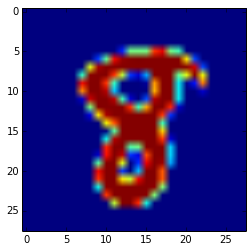

Received Image


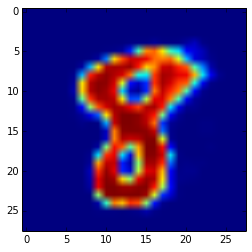

Original Image


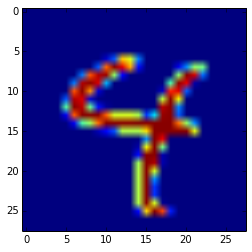

Received Image


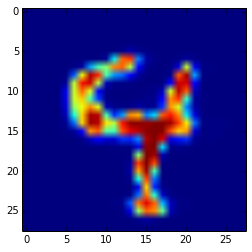

Original Image


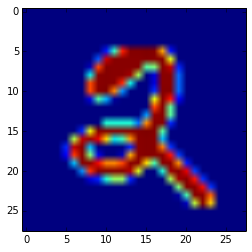

Received Image


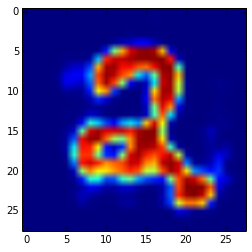

Original Image


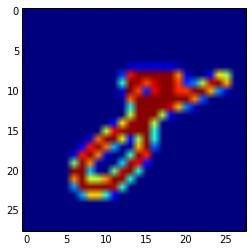

Received Image


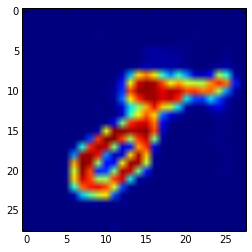

Original Image


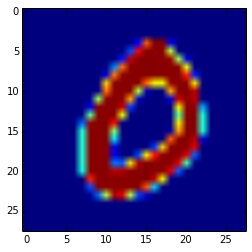

Received Image


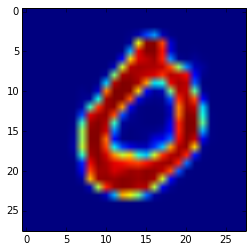

Original Image


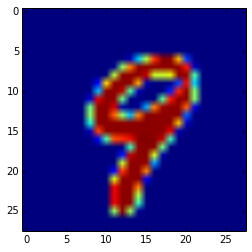

Received Image


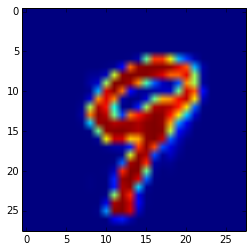

Original Image


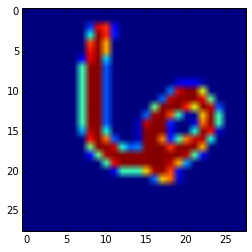

Received Image


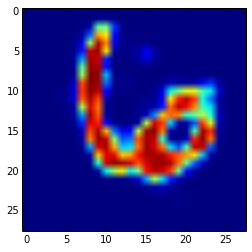

Original Image


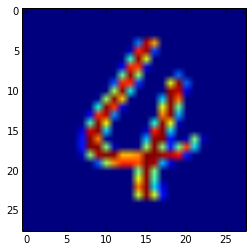

Received Image


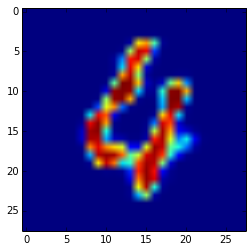

Original Image


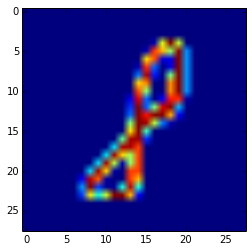

Received Image


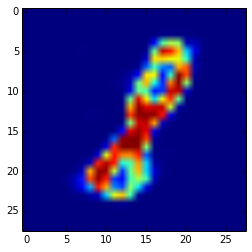

Original Image


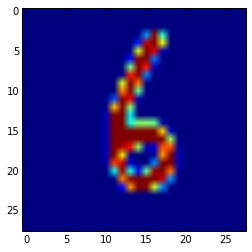

Received Image


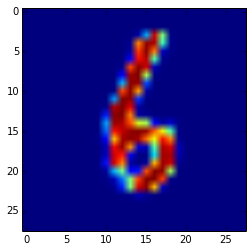

Original Image


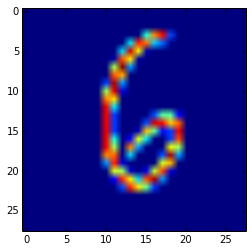

Received Image


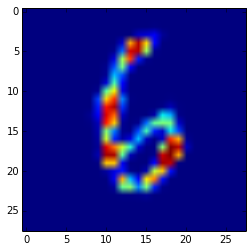

Original Image


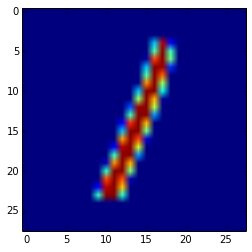

Received Image


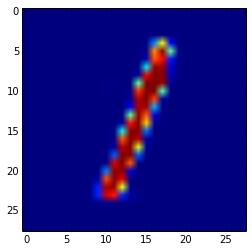

Original Image


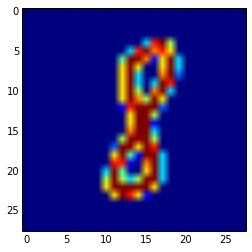

Received Image


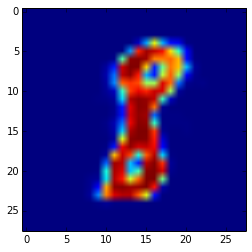

Original Image


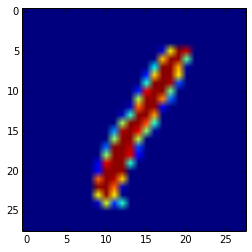

Received Image


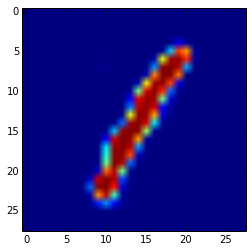

Original Image


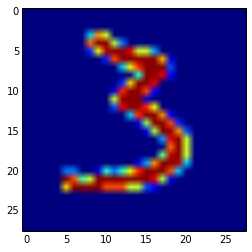

Received Image


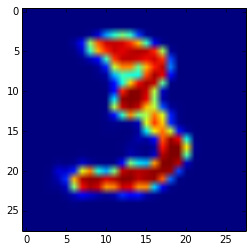

Original Image


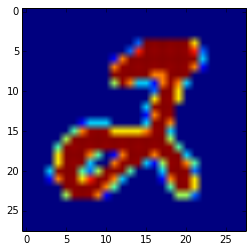

Received Image


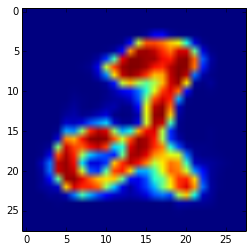

Original Image


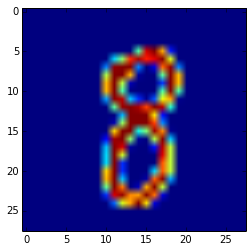

Received Image


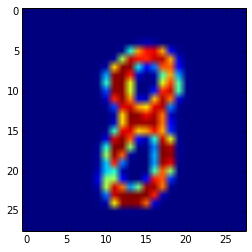

Original Image


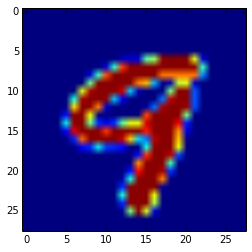

Received Image


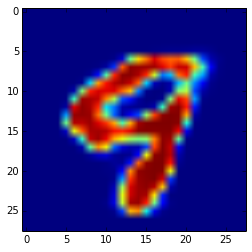

Original Image


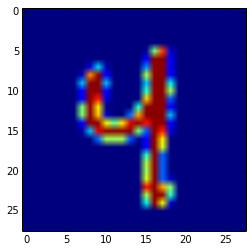

Received Image


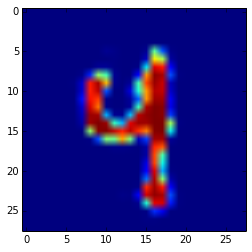

Original Image


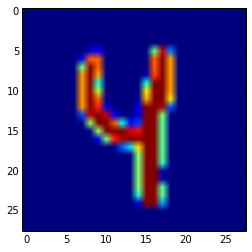

Received Image


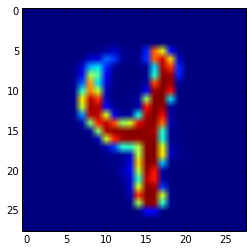

In [69]:
test_count = 20
np.random.shuffle(data)
test_images = data[:test_count]
pred_image = rbm.predict(test_images, mode ='image')
for i in range(test_count):
    print 'Original Image'
    plt.imshow(data[i].reshape(28, 28) * 255.)
    plt.show()
    print 'Received Image'
    plt.imshow(pred_image[i].reshape(28, 28) * 255.)
    plt.show()